In [1]:
import pandas as pd
train_df = pd.read_csv('./train_set.csv', sep='\t')

In [2]:
train_df.head(100)

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...
...,...,...
95,7,6065 3370 1519 499 7157 5620 3317 1679 3270 12...
96,1,7256 134 7539 7543 3137 3335 2695 669 3068 333...
97,2,7160 5087 2400 4411 7044 1519 7039 2265 408 67...
98,2,507 6981 2999 62 3080 6704 5310 2400 4411 1099...


In [3]:
# 分析新闻文本的长度
%pylab inline
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


Text(0.5, 1.0, 'Histogram of char count')

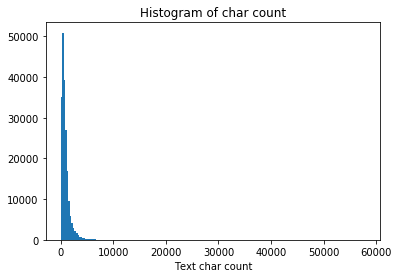

In [4]:
# 绘制直方图
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

Text(0.5, 0, 'category')

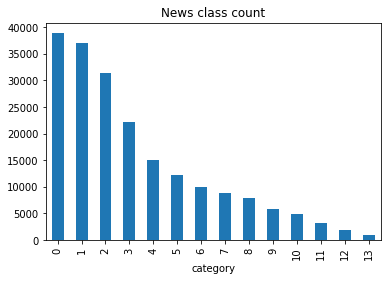

In [5]:
# 查看新闻的类别
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel('category')

In [7]:
# 字符分布统计
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(' '))
word_count

Counter({'2967': 150472,
         '6758': 23368,
         '339': 10114,
         '2021': 83310,
         '1854': 222220,
         '3731': 54661,
         '4109': 207564,
         '3792': 157293,
         '4149': 452545,
         '1519': 805002,
         '2058': 128542,
         '3912': 110946,
         '2465': 1087011,
         '2410': 146674,
         '1219': 97691,
         '6654': 111067,
         '7539': 523090,
         '264': 110968,
         '2456': 123589,
         '4811': 1159401,
         '1292': 32874,
         '2109': 921676,
         '6905': 19983,
         '5520': 161014,
         '7058': 216345,
         '6045': 381639,
         '3634': 156543,
         '6591': 1184,
         '3530': 315586,
         '6508': 207142,
         '7044': 202832,
         '3659': 1251253,
         '2073': 449518,
         '3750': 7482224,
         '6831': 332620,
         '2614': 570863,
         '3370': 2020958,
         '4269': 402128,
         '486': 227281,
         '5770': 11919,
        

In [8]:
print(len(word_count))

6869


In [9]:
word_count = sorted(word_count.items(), key = lambda d:d[1], reverse = True )
print(len(word_count))
print(word_count[0])
print(word_count[-1])

6869
('3750', 7482224)
('3133', 1)


In [10]:
from collections import Counter
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0])

print(word_count[1])

print(word_count[2])

('3750', 197997)
('900', 197653)
('648', 191975)


In [11]:
len(word_count)

6869

In [14]:
#作业1：假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成
"""
sum = 0
for i in range(len(word_count)):
    sum = sum + word_count[i][1]
print(sum)
everage = (sum - word_count[0][1]- word_count[1][1]- word_count[2][1])/200000
print(everage)
"""
average = (word_count[0][1]+ word_count[1][1]+ word_count[2][1])/200000
print(average)

2.938125


In [15]:
# 作业2：统计每类新闻中出现次数对多的字符
print(train_df.groupby('label').text.apply(lambda x: sorted(Counter(' '.join(list(x)).split(" ")).items(), key=lambda d:d[1], reverse = True)))

label
0     [(3750, 1267331), (648, 967653), (900, 577742)...
1     [(3750, 1200686), (648, 714152), (3370, 626708...
2     [(3750, 1458331), (648, 974639), (900, 618294)...
3     [(3750, 774668), (648, 494477), (900, 298663),...
4     [(3750, 360839), (648, 231863), (900, 190842),...
5     [(3750, 715740), (648, 329051), (900, 305241),...
6     [(3750, 469540), (648, 345372), (900, 222488),...
7     [(3750, 428638), (648, 262220), (900, 184131),...
8     [(3750, 242367), (648, 202399), (900, 92207), ...
9     [(3750, 178783), (648, 157291), (900, 70680), ...
10    [(3750, 180259), (648, 114512), (900, 75185), ...
11    [(3750, 83834), (648, 67353), (900, 37240), (4...
12    [(3750, 87412), (4464, 51426), (3370, 45815), ...
13    [(3750, 33796), (648, 26867), (900, 11263), (4...
Name: text, dtype: object
